# Numerical Integration
#### Preliminaries
We have to import the array library `numpy` and the plotting library `matplotlib.pyplot`, note that we define shorter aliases for these.

Next we import from `numpy` some of the functions that we will use more frequently and from an utility library functions to format conveniently our results.

Eventually we tell to the plotting library how we want to format our plots (`fivethirtyeight` is a predefined style that mimics a popular site of statistical analysis and yes, statistical analysis and popular apply both to a single item... while `00_mplrc` refers to some tweaks I prefer to use)

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, exp, pi, sin, sqrt 
from IPython.display import Latex, display
plt.style.use(['fivethirtyeight', './00_mplrc'])

## Plot of the load

We start analyzing the loading process.

Substituting $t_1=1.2$s in the expression of $p(t)$ we have

$$p(t) = \left({15625 \over 27} {t^3 \over s^3} - {8750 \over 9} {t^2 \over s^2} 
      + {1100 \over 3} {t \over s} + 400 \right)\text{N}$$

In [20]:
N = 6000
def it(t): return int((t+1)*N/3)

t = np.linspace(-1,2,N+1)
p = np.where(t<0, 0, np.where(
             t<=1.2, 15625./27*t**3 - 8750./9*t**2 + 1100./3*t + 400, 0))

We will use the above expression everywhere in the following.

Let's visualize this loading with the help of a plot:

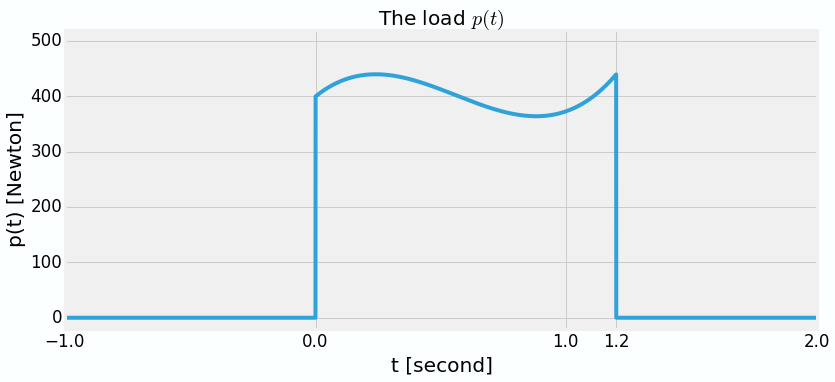

In [21]:
plt.plot(t,p)
plt.ylim((-20,520))
plt.xticks((-1,0,1,1.2,2))
plt.xlabel('t [second]')
plt.ylabel('p(t) [Newton]')
plt.title(r'The load $p(t)$')
plt.show()

From the plot it is apparent that the loading can be approximated by a constant rectangle plus a sine, of relatively small amplitude, with a period of about 1 second.

I expect that the forced response will be a damped oscillation about the static displacement $400/k$, followed by a free response in which we will observe a damped oscillation about the zero displacement.

## The Particular Integral

Writing the particuar integral as

$$\xi(t) = \left(A {t^3 \over s^3} + B {t^2 \over s^2} 
      + C {t \over s} + D \right)$$
      
where $A, B, C, D$ all have the dimension of a length, deriving with respect to time and substituting in the equation of motion we have

$$\left( 6A\frac{t}{s} + 2 B\right)\frac{m}{s^2} 
      + \left( 3A\frac{t^2}{s^2} + 2B\frac{t}{s} + C \right) \frac{c}{s}
      + \left( A\frac{t^3}{s^3} + B\frac{t^2}{s^2} + C\frac{t}{s} + D \right) k=\left({15625 \over 27} {t^3 \over s^3} - {8750 \over 9} {t^2 \over s^2} 
      + {1100 \over 3} {t \over s} + 400 \right)\text{N}$$
      
Collecting the powers of $t/s$ in the left member we have

$$A k \frac{t^3}{s^3} + \left( B k + \frac{3 A c}{s} \right) \frac{t^2}{s^2} +  \left( C k + \frac{2 B c}{s} + \frac{6 A m}{s^2} \right) \frac{t}{s}
      + \left(D k + \frac{C c}{s} + \frac{2 B m}{s^2}\right)=\left({15625 \over 27} {t^3 \over s^3} - {8750 \over 9} {t^2 \over s^2} 
      + {1100 \over 3} {t \over s} + 400 \right)\text{N}$$

and equating the coefficients of the different powers, starting from the higher to the lower ones, we have a sequence of equations of a single unknown, solving this sequence of equations gives, upon substitution of the numerical values of the system parameters,

\begin{align*}
  A& = \frac{625}{14256}\text{m}=0.0438411896745
\text{m}\\
  B& = \left(\frac{-175}{2376} - \frac{19}{209088} \sqrt{11}\right)\text{m}=-0.0739545830991
\text{m}\\
  C& = \left(\frac{133}{1306800} \sqrt{11} + \frac{218117}{7920000}\right)\text{m}=0.0278775758319\text{m}\\
  D& = \left(\frac{3013181}{99000000} - \frac{135571859}{7187400000000} \sqrt{11}\right)\text{m}=0.0303736121006\text{m}\\
\end{align*}

Substituting in $\xi(t)$ and taking the time derivative we have

\begin{align*}
  \xi(t) &= \frac{625}{14256} t^3 - 
            \left( \frac{19}{209088} \sqrt{11} + \frac{175}{2376} \right) t^2 +
            \left( \frac{133}{1306800} \sqrt{11} + \frac{218117}{7920000} \right) t -
            \frac{135571859}{7187400000000} \sqrt{11} + \frac{3013181}{99000000},\\
  \dot\xi(t) &= \frac{625}{4752} t^2 - 
              2 \left( \frac{19}{209088} \sqrt{11} + \frac{175}{2376} \right) t + 
              \frac{133}{1306800} \sqrt{11} + \frac{218117}{7920000}
\end{align*}

In [22]:
xi = np.where(t<0, 0,
     np.where(t<=1.2001,
              625./14256*t**3 - (19./209088*sqrt(11) + 175./2376)*t**2 
          + t*(133./1306800*sqrt(11) + 218117./7920000) 
          - 135571859./7187400000000*sqrt(11) + 3013181./99000000, 0))
dot_xi = np.where(t<0, 0,
         np.where(t<=1.2001, 
                  625./4752*t**2 - 2*(t*(19./209088*sqrt(11) + 175./2376)) 
                + 133./1306800*sqrt(11) + 218117./7920000, 0))
xi_0 = - 135571859./7187400000000*sqrt(11) + 3013181./99000000
dot_xi_0 = + 133./1306800*sqrt(11) + 218117./7920000

### Plot of the particular integral

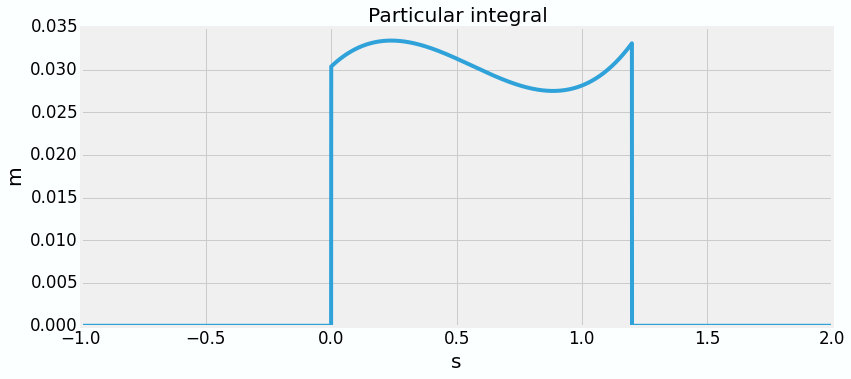

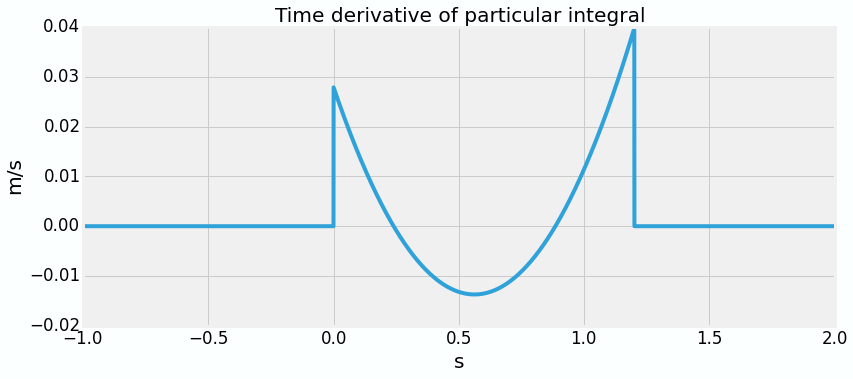

In [23]:
plt.plot(t,xi)
plt.title('Particular integral')
plt.xlabel('s')
plt.ylabel('m')
plt.show()
plt.plot(t, dot_xi)
plt.title('Time derivative of particular integral')
plt.xlabel('s')
plt.ylabel('m/s')
plt.show()

## System Response

### Forced Response $0\le t\le t_1$

The response in terms of displacement and velocity is

\begin{align}
  x(t) &= \exp(-\zeta\omega_nt) \left(
    R\cos(\omega_Dt) + S\sin(\omega_Dt)\right) + \xi(t),\\
  v(t) &= \exp(-\zeta\omega_nt) \left(
    \left(S\cos(\omega_Dt)-R\sin(\omega_Dt)\right)\omega_D - 
    \left(R\cos(\omega_Dt)+S\sin(\omega_Dt)\right)\zeta\omega_n 
  \right) + \dot\xi(t)
\end{align}

and we can write the following initial conditions, taking into account that at time $t=0$ the system is at rest,

\begin{align}
  x(0) &= 1 \cdot \left(
    R\cdot1 + S\cdot0\right) + \xi_0\\&=R+\xi_0=0,\\
  \dot x(0) &= 1 \cdot \left(
    \left(S\cdot1-R\cdot0\right)\omega_D - 
    \left(R\cdot1+S\cdot0\right)\zeta\omega_n 
  \right) + \dot\xi_0\\&=S\omega_D-R\zeta\omega_n+\dot\xi_0=0
\end{align}

The constants of integration are

\begin{align}
  R &= -\xi_0,\\
  S &= \frac{R\zeta\omega_n-\dot\xi_0}{\omega_D}
\end{align}

In [24]:
mass = 12.0
stif = 13200.0
zeta = 0.038

w2_n = stif/mass
w1_n = sqrt(w2_n)
w1_D = w1_n*sqrt(1-zeta**2)

damp = 2*zeta*w1_n*mass

R = -xi_0
S = (R*zeta*w1_n-dot_xi_0)/w1_D

display(HTML("<center><h3>Forced Displacements</h3></center>"))
display(Latex(r"""
    $x(t) = \exp(-%g\cdot%g\,t) \left(
    %+g\cos(%g\,t)%+g\sin(%g\,t)
    \right)+\xi(t)$
    """%(zeta,w1_n,R,w1_D,S,w1_D)))

t1  = 1.2
it1 = it(t1)

x_t1 = exp(-zeta*w1_n*t1)*(R*cos(w1_D*t1)+S*sin(w1_D*t1))+xi[it1]
v_t1 =(exp(-zeta*w1_n*t1)*(R*cos(w1_D*t1)+S*sin(w1_D*t1))*(-zeta)*w1_n
      +exp(-zeta*w1_n*t1)*(S*cos(w1_D*t1)-R*sin(w1_D*t1))*w1_D
      +dot_xi[it1])
display(Latex(
        r'$$x(t_1)=x_1=%+g\,\text{m},\qquad v(t_1)=v_1=%+g\,\text{m/s}$$'%
        (x_t1,v_t1)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Free Response

For $t\ge t_1$ the response (no external force) is given by

\begin{align}
  x^*(t) &= \exp(-\zeta\omega_nt) \left(R^*\cos(\omega_Dt) + S^*\sin(\omega_Dt)\right),\\
  v^*(t) &= \exp(-\zeta\omega_nt) \left(
    \left(S^*\cos(\omega_Dt)-R^*\sin(\omega_Dt)\right)\omega_D - 
    \left(R^*\cos(\omega_Dt)+S^*\sin(\omega_Dt)\right)\zeta\omega_n 
  \right).
\end{align}

By the new initial conditions,

$$x^*(t_1) = x(t_1) = x_1, \qquad v^*(t_1) = v(t_1) = v_1,$$

we have, with 
$e_1 = \exp(-\zeta\omega_{n}t_1)$, 
$c_1 = \cos(\omega_Dt_1)$ and
$s_1 = \sin(\omega_Dt_1)$

$$ e_1 \begin{bmatrix} 
     c_1 & s_1 \\
     -\omega_D s_1 - \zeta\omega_n c_1 & \omega_D c_1 - \zeta\omega_n s_1 \end{bmatrix} \,
     \begin{Bmatrix}R^*\\S^*\end{Bmatrix} = \begin{Bmatrix}x_1\\v_1\end{Bmatrix}
$$

that gives

$$
\begin{Bmatrix}R^*\\S^*\end{Bmatrix} =
\frac{1}{\omega_D\,e_1}\,
\begin{bmatrix}
  \omega_D c_1 - \zeta\omega_n s_1 & -s_1 \\
  \zeta\omega_n c_1 + \omega_D s_1 & c_1 
\end{bmatrix}\,
\begin{Bmatrix}x_1\\v_1\end{Bmatrix}.
$$

In [25]:
e_t1 = exp(-zeta*w1_n*t1)
c_t1 = cos(w1_D*t1)
s_t1 = sin(w1_D*t1)

Rs = (w1_D*c_t1*x_t1 - zeta*w1_n*s_t1*x_t1 - s_t1*v_t1) /w1_D /e_t1
Ss = (w1_D*s_t1*x_t1 + zeta*w1_n*c_t1*x_t1 + c_t1*v_t1) /w1_D /e_t1

display(HTML("<center><h3>Free Displacements</h3></center>"))
display(Latex(r"""
    $$x^*(t) = \exp(-%g\cdot%g\,t) \left(
    %+g\cos(%g\,t)%+g\sin(%g\,t)
    \right)$$
    """%(zeta,w1_n,Rs,w1_D,Ss,w1_D)))

xs_t1 = exp(-zeta*w1_n*t1)*(Rs*cos(w1_D*t1)+Ss*sin(w1_D*t1))
vs_t1 = ((exp(-zeta*w1_n*t1)*(Rs*cos(w1_D*t1)+Ss*sin(w1_D*t1))*(-zeta)*w1_n
      +exp(-zeta*w1_n*t1)*(Ss*cos(w1_D*t1)-Rs*sin(w1_D*t1))*w1_D))

display(Latex(r'$$x^*(t_1)=%+g\,\text{m},\qquad v^*(t_1) = %+g\,\text{m/s}$$'%
              (xs_t1,vs_t1)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Putting it all together

First, the homogeneous response

In [26]:
x_hom = np.where(t<0, 0,
        np.where(t<1.2001, exp(-zeta*w1_n*t) * (R *cos(w1_D*t) + S *sin(w1_D*t)),
                           exp(-zeta*w1_n*t) * (Rs*cos(w1_D*t) + Ss*sin(w1_D*t))))
v_hom = np.where(t<0, 0,
        np.where(t<1.2001,
                 exp(-t*zeta*w1_n) * (
                    ( S*w1_D- R*zeta*w1_n)*cos(t*w1_D) -
                    ( S*zeta*w1_n+ R*w1_D)*sin(t*w1_D)),
                 exp(-t*zeta*w1_n) * (
                    (Ss*w1_D-Rs*zeta*w1_n)*cos(t*w1_D) -
                    (Ss*zeta*w1_n+Rs*w1_D)*sin(t*w1_D))))

then, we put together the homogeneous response and the particular integral, in the different intervals

In [27]:
x = x_hom+xi
v = v_hom+dot_xi

### Plot of the response

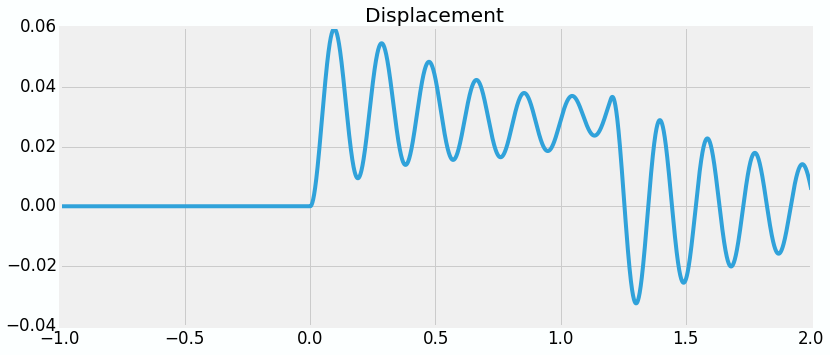

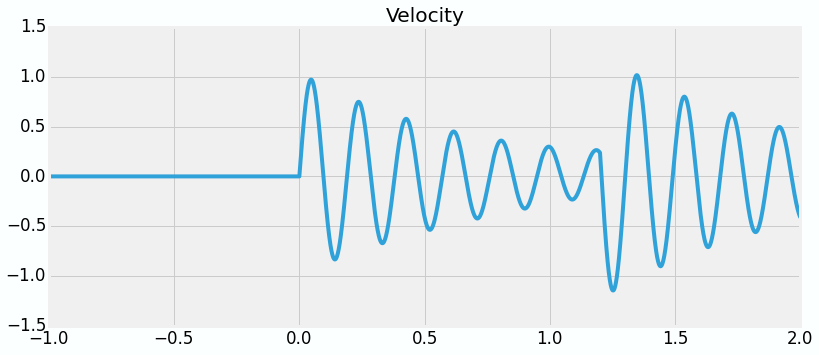

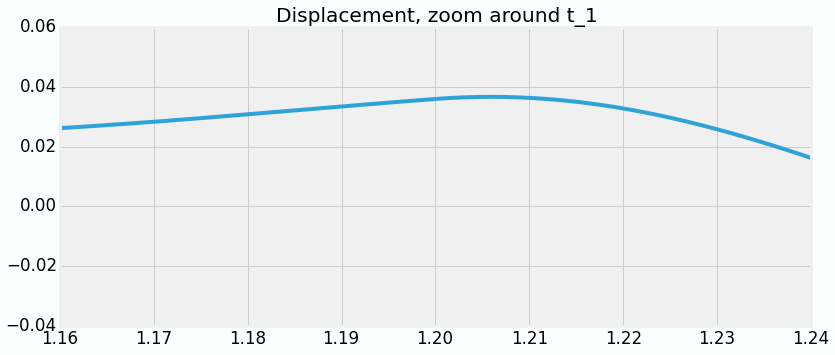

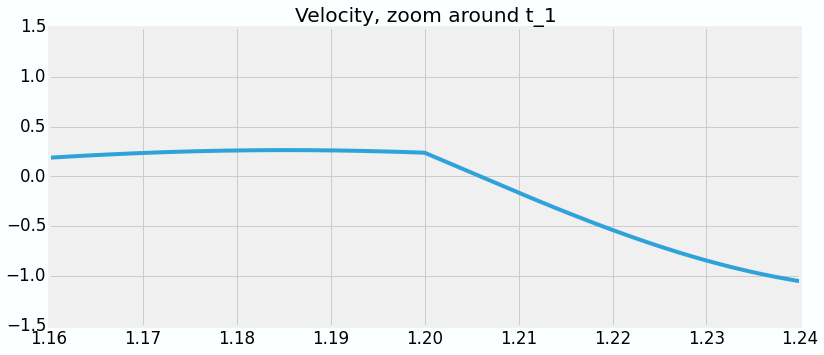

In [28]:
plt.plot(t,x)
plt.title('Displacement')
plt.show()

plt.plot(t,v)
plt.title('Velocity')
plt.show()

plt.plot(t,x)
plt.title('Displacement, zoom around t_1')
plt.xlim((1.16,1.24))
plt.show()

plt.plot(t,v)
plt.title('Velocity, zoom around t_1')
plt.xlim((1.16,1.24))
plt.show()

## Numerical Integration

The time step we are going to use is specified in terms of the natural period of vibration, $h=T_n/12$:

In [29]:
t_n = 2*pi/w1_n
h = t_n/12.0

We need a function that returns the value of the load,

In [30]:
def load(t):
    return 0 if t > 1.20001 else (
        + 578.703703703703705*t**3 
        - 972.22222222222222*t**2
        + 366.666666666666667*t
        + 400.)

### Initialization

The final time for the computation, the factors that modify the increment of the load to take into account the initial conditions, the modified stiffness, the containers for the results, the initial values of the results.

In [31]:
stop = 2.0 + h/2

a0fac = 3.0*mass + damp*h/2.0
v0fac = 6.0*mass/h + 3.0*damp

ks = stif + 3.0*damp/h + 6.0*mass/h**2

T, X, V, A = [], [], [], []

x0 = 0
v0 = 0
t0 = 0
p0 = load(t0)

### Computational Loop

In [32]:
while t0 < stop:
    a0 = (p0-stif*x0-damp*v0)/mass
    for current, vec in zip((t0,x0,v0,a0),(T,X,V,A)):
        vec.append(current)
    t1 = t0+h
    p1 = load(t1)
    dp = p1-p0
    dx = (dp+a0fac*a0+v0fac*v0)/ks
    dv = 3*dx/h -a0*h/2 -3*v0
    t0 = t1 ; p0 = p1 ; x0 = x0+dx ; v0 = v0+dv

### The Plot

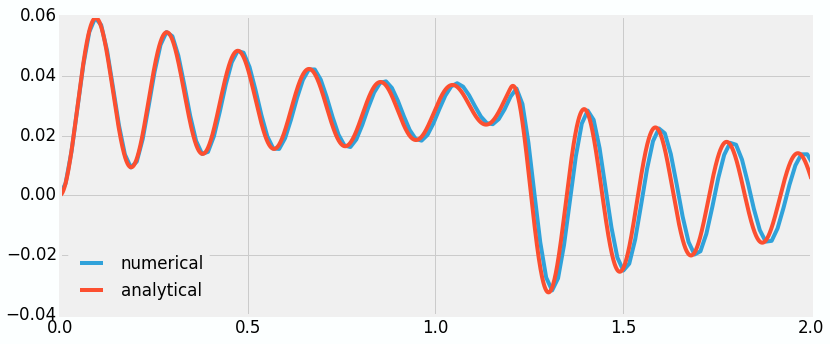

In [33]:
plt.plot(T,X,label='numerical')
plt.plot(t,x,label='analytical')
plt.xlim((0,2))
plt.legend(loc=3);

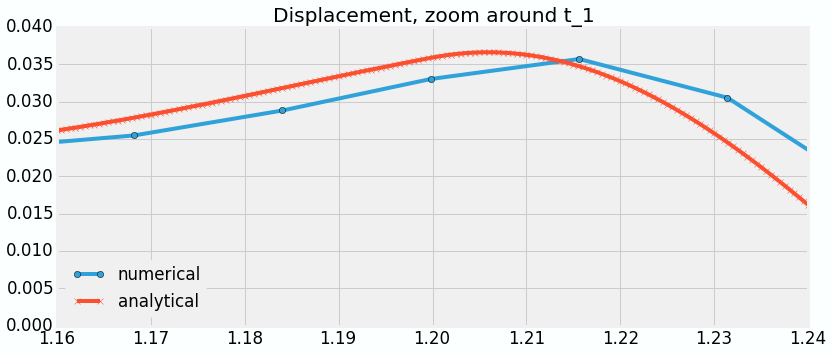

In [34]:
plt.plot(T,X,'-o',label='numerical')
plt.plot(t,x,'-x',label='analytical')
plt.title('Displacement, zoom around t_1')
plt.xlim((1.16,1.24))
plt.ylim((0,0.04))
plt.legend(loc=3)
plt.show()

In [35]:
# an IPython incantation that properly formats this notebook
from IPython.display import HTML
HTML(open("00_custom.sav.css", "r").read())